In [1]:
import numpy as np
import pandas as pd

In [2]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def sigmoid_derivative(z):
        return sigmoid(z)*(1-sigmoid(z))


cost = []

def threshold(z):
    z = np.array([1 if z_ >= 0.5 else 0 for z_ in z])
    return z
    

class MultilayerPerceptron:
    '''
    Parameters:
        learning_rate (float): Learning rate for our model
        
        hidden_layers (list): Number of hidden layers and neurons in them. 
            Example: [2, 2] has two hidden layers, each has 2 neurons
            
        epoch: The number of passes through the entire training dataset. 
            We use batch size as entire dataset so 1 epoch = 1 iteration
    '''
    def __init__(self, learning_rate=0.1, hidden_layers=[2], n_epochs = 100):
    
        self.learning_rate = learning_rate 
        self.layers = hidden_layers
        self.n_epochs = n_epochs
        
    def init_weight(self, n_features):
        
        np.random.seed(42)
        
        self.layers.insert(0, n_features) # For input layer
        self.layers.append(1)             # For output layer. We only cover binary classification so there's only one node
        
        self.weights = [[]] # Weights start from one so w[0] = []
        self.bias = [[]]    # Same as weights
        
        for i in range(1, len(self.layers)):
            w = np.random.randn(self.layers[i-1], self.layers[i])
            b = np.ones((1, self.layers[i]))
            self.weights.append(w)
            self.bias.append(b)
            
    def fit(self, X, y):
        
        self.init_weight(X.shape[1])
        
        for epoch in range(self.n_epochs):
            
            Z, A = self.feedforward(X)
            dw, db = self.backprop(Z, A, y)
            
            _c = -1/X.shape[0] * np.sum(y * np.log(A[-1]) + (1-y) * np.log(1 - A[-1]))
            
            if epoch % 10 == 0:
                print('Cost: ', _c)
                
            cost.append(_c)
            
            for i in range(1, len(self.layers)):
                
                self.weights[i] -= self.learning_rate * dw[i]
                self.bias[i] -= self.learning_rate * db[i]
            
            
        
    def feedforward(self, X):
        
        A = [X]  # Output after activation 
        Z = [[]] # Weighted sum
        
        for i in range(1, len(self.layers)):
            
            _x = A[-1]
            _x = np.dot(_x, self.weights[i]) + self.bias[i]
            _a = sigmoid(_x)
            
            Z.append(_x)
            A.append(_a)
    
        return (Z, A)
    
    def backprop(self, Z, A, y):
        
        y_pred = A[-1]
        
        dz = [[] for i in range(len(self.layers))]
        db = dz.copy()
        dw = dz.copy()
        
        
        for i in range(len(self.layers)-1, 0, -1):
            
            if i == len(self.layers)-1:
                dz[i] = y_pred - y
            else:
                dz[i] = np.dot(dz[i+1], self.weights[i+1].T) * sigmoid_derivative(Z[i])
                
            dw[i] = np.dot(A[i-1].T, dz[i])
            db[i] = np.sum(dz[i])
                
            
            
        return (dw, db)
    
    def predict(self, X):
        
        A = self.feedforward(X)[1]
        
        return threshold(A[-1])
        
        
            
            
        


In [3]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


age: age in years

sex: 1 = male; 0 = female

cp:  chest pain type 0, 1, 2, 3

trestbps: resting blood pressure (in mm Hg on admission to the hospital)

chol: serum cholestoral in mg/dl

fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg: resting electrocardiographic results

thalach: maximum heart rate achieved

exang: exercise induced angina (1 = yes; 0 = no)

oldpeakST: depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment

ca: number of major vessels (0-3) colored by flourosopy

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

target: 1 or 0

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df['sex'] = df['sex'].astype("object") 
df['cp'] = df['cp'].astype("object") 
df['fbs'] = df['fbs'].astype("object") 
df['thal'] = df['thal'].astype("object")
df['restecg'] = df['restecg'].astype("object")
df['slope'] = df['slope'].astype("object")
df['exang'] = df['exang'].astype("object")
df['thal'] = df['thal'].astype("object")

In [6]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca            int64
thal         object
target        int64
dtype: object

In [7]:
df = pd.get_dummies(df, drop_first=True)

In [8]:
df.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'target',
       'sex_1', 'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2',
       'exang_1', 'slope_1', 'slope_2', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [9]:
import matplotlib.pyplot as plt

In [10]:

def normalization(col):
    res = (df[col] - df[col].min())/(df[col].max() - df[col].min())
    return res


df['trestbps'] = normalization('trestbps')
df['age']= normalization('age')
df['chol'] = normalization('chol')
df['thalach'] = normalization('thalach')
df['oldpeak'] = normalization('oldpeak')
df['ca'] = normalization('ca')


In [11]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [12]:
df.head()

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
0,0.708333,0.481132,0.244292,0.603053,0.370968,0.0,1,1,0,0,1,1,0,0,0,0,0,1,0,0
1,0.166667,0.339623,0.283105,0.885496,0.564516,0.0,1,1,0,1,0,0,1,0,0,0,0,0,1,0
2,0.250000,0.339623,0.178082,0.770992,0.225806,0.0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
3,0.562500,0.245283,0.251142,0.816794,0.129032,0.0,1,1,1,0,0,0,1,0,0,0,1,0,1,0
4,0.583333,0.245283,0.520548,0.702290,0.096774,0.0,1,0,0,0,0,0,1,0,1,0,1,0,1,0


In [13]:
df_X = df.drop(columns = ['target'])
df_y = df['target']

In [14]:
df_X

,age,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
0,0.708333,0.481132,0.244292,0.603053,0.370968,0.00,1,0,0,1,1,0,0,0,0,0,1,0,0
1,0.166667,0.339623,0.283105,0.885496,0.564516,0.00,1,0,1,0,0,1,0,0,0,0,0,1,0
2,0.250000,0.339623,0.178082,0.770992,0.225806,0.00,0,1,0,0,0,0,0,0,0,1,0,1,0
3,0.562500,0.245283,0.251142,0.816794,0.129032,0.00,1,1,0,0,0,1,0,0,0,1,0,1,0
4,0.583333,0.245283,0.520548,0.702290,0.096774,0.00,0,0,0,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.433962,0.262557,0.396947,0.032258,0.00,0,0,0,0,0,1,0,1,1,0,0,0,1
299,0.333333,0.150943,0.315068,0.465649,0.193548,0.00,1,0,0,1,0,1,0,0,1,0,0,0,1
300,0.812500,0.471698,0.152968,0.534351,0.548387,0.50,1,0,0,0,1,1,0,0,1,0,0,0,1
301,0.583333,0.339623,0.011416,0.335878,0.193548,0.25,1,0,0,0,0,1,0,1,1,0,0,0,1


In [15]:
X = df_X.to_numpy()
y = df_y.to_numpy().reshape(-1, 1)

In [16]:
np.random.seed(42)

In [17]:
X_train, X_test, y_train ,y_test = train_test_split(X, y, test_size = 0.3)

In [18]:
model = MultilayerPerceptron(learning_rate=0.01, hidden_layers=[16,8], n_epochs = 500)
model.fit(X_train, y_train)

Cost:  1.2987871335392345
Cost:  0.6486575957999517
Cost:  0.3953038539346017
Cost:  0.3722966618333161
Cost:  0.35774559049732035
Cost:  0.3460394926954629
Cost:  0.33624922171666005
Cost:  0.3278812457401487
Cost:  0.3205807473164646
Cost:  0.31409382313927925
Cost:  0.30823422354801283
Cost:  0.3028578814217114
Cost:  0.29784909828075196
Cost:  0.2931845654088122
Cost:  0.29929826252904995
Cost:  0.35598820203924153
Cost:  0.2842463933744532
Cost:  0.2785155782536733
Cost:  0.2761106866046194
Cost:  0.29967929857305786
Cost:  0.29408743263048437
Cost:  0.269472057861964
Cost:  0.2685363812480694
Cost:  0.28155518112357103
Cost:  0.27113687792261326
Cost:  0.2602281680912927
Cost:  0.26090786335954563
Cost:  0.26190664911172523
Cost:  0.2542204721922184
Cost:  0.2498633455969512
Cost:  0.24924592388971833
Cost:  0.24613194396213886
Cost:  0.24155074711031688
Cost:  0.23921284150697092
Cost:  0.237046633627713
Cost:  0.23334903952639566
Cost:  0.23026477507555868
Cost:  0.227699763799

In [19]:
y_pred = model.predict(X_test)

In [20]:
print('Accuracy test: ', accuracy_score(y_pred, y_test.flatten())*100, '%')

Accuracy test:  85.71428571428571 %


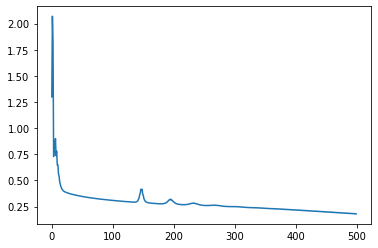

In [21]:
plt.plot(cost)